In [1]:
from sqlalchemy import create_engine
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
from dotenv import load_dotenv
load_dotenv()

True

In [2]:
host = os.getenv("HOST")
port = os.getenv("PORT")
user = os.getenv("DB_USER")
password = os.getenv("DB_PASSWORD")
database = os.getenv("DB_DATABASE")
engine = create_engine(f"postgresql://{user}:{password}@{host}:{port}/{database}")

In [3]:
loan = pd.read_sql("select * from loan_outcomes", engine)
gps = pd.read_sql("select * from gps_fixes", engine)
attr = pd.read_sql("select * from user_attributes", engine)

In [9]:
loan.shape, gps.shape, attr.shape

((400, 3), (26710, 9), (400, 3))

In [10]:
loan.isnull().sum()

user_id           0
application_at    0
loan_outcome      0
dtype: int64

In [11]:
loan["loan_outcome"].value_counts()

loan_outcome
defaulted    200
repaid       200
Name: count, dtype: int64

In [60]:
attr

,user_id,age,cash_incoming_30days
0,1,42,8988.12
1,2,36,9968.12
2,3,27,59.04
3,4,38,2129.03
4,5,33,2102.53
...,...,...,...
395,396,29,1947.86
396,397,28,6099.13
397,398,24,7136.95
398,399,62,18043.21


In [61]:
attr.isnull().sum()

user_id                 0
age                     0
cash_incoming_30days    0
dtype: int64

In [19]:
main = pd.merge(loan, attr, on='user_id', how='left')

In [20]:
main

,user_id,application_at,loan_outcome,age,cash_incoming_30days
0,1,2017-08-14 09:08:50.000000,defaulted,42,8988.12
1,2,2016-05-17 10:10:12.447976,repaid,36,9968.12
2,3,2016-10-20 10:07:20.459081,defaulted,27,59.04
3,4,2017-01-13 13:03:34.000000,defaulted,38,2129.03
4,5,2016-11-03 15:41:39.124610,repaid,33,2102.53
...,...,...,...,...,...
395,396,2016-10-10 12:20:18.367328,defaulted,29,1947.86
396,397,2018-02-12 08:29:42.000000,defaulted,28,6099.13
397,398,2016-08-30 11:01:41.879989,defaulted,24,7136.95
398,399,2016-09-11 08:14:06.034076,defaulted,62,18043.21


In [12]:
gps

,gps_fix_at,server_upload_at,longitude,latitude,accuracy,altitude,bearing,location_provider,user_id
0,2017-06-22 09:37:20,2017-06-22 09:43:42,36.840540,-1.294342,68.4,0.0,0.0,fused,1
1,2017-08-14 07:50:27,2017-08-14 09:05:27,36.895270,-1.341928,1409.0,0.0,0.0,fused,1
2,2017-06-13 10:34:29,2017-06-13 10:54:48,36.811903,-1.307220,68.4,0.0,0.0,fused,1
3,2017-06-18 12:16:20,2017-06-18 12:16:24,36.907049,-1.309984,1581.0,0.0,0.0,fused,1
4,2017-06-28 09:39:08,2017-06-28 09:58:12,36.839396,-1.280310,1396.0,0.0,0.0,fused,1
...,...,...,...,...,...,...,...,...,...
26705,2016-04-18 16:29:59,2016-04-18 16:30:04,37.353319,-1.298492,4744.0,-1.0,-1.0,network,400
26706,2016-06-03 12:50:27,2016-06-03 12:50:36,37.368250,-1.298735,4656.0,-1.0,-1.0,network,400
26707,2016-06-03 15:14:14,2016-06-03 15:14:21,37.359132,-1.314915,4656.0,-1.0,-1.0,network,400
26708,2016-05-14 16:55:33,2016-05-14 16:55:48,37.350336,-1.260356,3419.0,-1.0,-1.0,network,400


In [13]:
gps['location_provider'].value_counts()

location_provider
fused             23026
network            2792
gps                 871
local_database       21
Name: count, dtype: int64

In [14]:
gps.isnull().sum()

gps_fix_at           0
server_upload_at     0
longitude            0
latitude             0
accuracy             0
altitude             0
bearing              0
location_provider    0
user_id              0
dtype: int64

In [15]:
gps['accuracy'].describe()

count    2.671000e+04
mean     1.006282e+03
std      1.905380e+04
min     -2.147463e+06
25%      2.050250e+01
50%      1.100000e+02
75%      2.200000e+03
max      6.451553e+05
Name: accuracy, dtype: float64

In [16]:
(gps['accuracy'] < 0).sum()

np.int64(2)

In [ ]:
(gps['altitude'] < 0).sum()

np.int64(2973)

In [ ]:
from math import radians, sin, cos, sqrt, atan2

def haversine_distance(lat1, lon1, lat2, lon2):
    """Calculate distance between two coordinates in kilometers"""
    R = 6371  # Earth's radius in km
    lat1, lon1, lat2, lon2 = map(radians, [lat1, lon1, lat2, lon2])
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * atan2(sqrt(a), sqrt(1-a))
    return R * c

# Converting timestamps
gps['gps_fix_at'] = pd.to_datetime(gps['gps_fix_at'])
gps['server_upload_at'] = pd.to_datetime(gps['server_upload_at'])
loan['application_at'] = pd.to_datetime(loan['application_at'])

# GPS features
gps_features = pd.DataFrame()

for user_id in gps['user_id'].unique():
    user_gps = gps[gps['user_id'] == user_id].sort_values('gps_fix_at')
    
    if len(user_gps) == 0:
        continue
    
    # Basic Engagement Features
    num_gps_records = len(user_gps)
    days_gps_span = (user_gps['gps_fix_at'].max() - user_gps['gps_fix_at'].min()).days
    gps_records_per_day = num_gps_records / max(days_gps_span, 1)
    
    # Accuracy Features
    avg_accuracy = user_gps[user_gps['accuracy'] > 0]['accuracy'].mean()
    
    # Location Diversity
    unique_locations = user_gps.groupby(['latitude', 'longitude']).size().count()
    
    # Geographic Features
    lat_range = user_gps['latitude'].max() - user_gps['latitude'].min()
    lon_range = user_gps['longitude'].max() - user_gps['longitude'].min()
    geographic_spread = sqrt(lat_range**2 + lon_range**2)
    
    # Distance Traveled
    total_distance = 0
    for i in range(len(user_gps) - 1):
        dist = haversine_distance(
            user_gps.iloc[i]['latitude'], user_gps.iloc[i]['longitude'],
            user_gps.iloc[i+1]['latitude'], user_gps.iloc[i+1]['longitude']
        )
        total_distance += dist
    
    # Provider Quality
    provider_quality = {'gps': 3, 'fused': 2, 'network': 1, 'passive': 0}
    avg_provider_quality = user_gps['location_provider'].map(provider_quality).mean()
    
    # Upload Delay
    user_gps['upload_delay'] = (user_gps['server_upload_at'] - user_gps['gps_fix_at']).dt.total_seconds() / 60
    avg_upload_delay = user_gps[user_gps['upload_delay'] >= 0]['upload_delay'].mean()
    
    # Recency
    days_since_last_gps = (pd.Timestamp.now() - user_gps['gps_fix_at'].max()).days
    
    gps_features = pd.concat([gps_features, pd.DataFrame({
        'user_id': [user_id],
        'num_gps_records': [num_gps_records],
        'days_gps_span': [days_gps_span],
        'gps_records_per_day': [gps_records_per_day],
        'avg_accuracy': [avg_accuracy],
        'unique_locations': [unique_locations],
        'lat_range': [lat_range],
        'lon_range': [lon_range],
        'geographic_spread': [geographic_spread],
        'total_distance_km': [total_distance],
    })], ignore_index=True)

gps_features.reset_index(drop=True, inplace=True)

# We could also convert the lat/long to respective cities/country for better EDA and to train better model with more Data samples(Deep Learning Approach) 


In [23]:
gps_features

,user_id,num_gps_records,days_gps_span,gps_records_per_day,avg_accuracy,unique_locations,lat_range,lon_range,geographic_spread,total_distance_km
0,1,70,203,0.344828,1105.084571,70,3.930248,3.447361,5.227920,1627.857783
1,2,10,718,0.013928,48.596000,10,1.961739,3.352228,3.884051,450.895143
2,3,1,0,1.000000,6.500000,1,0.000000,0.000000,0.000000,0.000000
3,4,2,155,0.012903,2172.200000,2,0.015547,0.025924,0.030229,3.361222
4,5,9,477,0.018868,43.461111,9,43.038091,110.801239,118.866277,11833.467149
...,...,...,...,...,...,...,...,...,...,...
367,396,31,772,0.040155,658.179032,31,1.860937,2.627290,3.219587,1555.439541
368,397,7,531,0.013183,1110.642857,7,0.041045,0.055577,0.069090,17.249026
369,398,9,84,0.107143,9.066667,9,0.046562,0.028280,0.054477,14.315405
370,399,32,174,0.183908,65.030000,32,0.055436,0.109241,0.122502,87.166613


In [18]:
(gps['latitude'] < -90).sum() or (gps['latitude'] > 90).sum()
(gps['longitude'] < -180).sum() or (gps['longitude'] > 180).sum()

Q1 = gps['accuracy'].quantile(0.25)
Q3 = gps['accuracy'].quantile(0.75)
IQR = Q3 - Q1
outliers = gps[(gps['accuracy'] < Q1 - 1.5*IQR) | (gps['accuracy'] > Q3 + 1.5*IQR)]
print(f"Outliers in accuracy: {len(outliers)}")

Outliers in accuracy: 20


In [24]:
main = pd.merge(main, gps_features, on='user_id', how='left')

In [30]:
main.fillna(0, inplace=True)

In [31]:
main.isnull().sum()

user_id                 0
application_at          0
loan_outcome            0
age                     0
cash_incoming_30days    0
num_gps_records         0
days_gps_span           0
gps_records_per_day     0
avg_accuracy            0
unique_locations        0
lat_range               0
lon_range               0
geographic_spread       0
total_distance_km       0
dtype: int64

In [21]:
gps['user_id'].value_counts()

user_id
278    1615
30      619
100     494
162     416
223     398
       ... 
337       2
3         1
314       1
340       1
367       1
Name: count, Length: 372, dtype: int64

In [32]:
sns.set_style("whitegrid")

<Figure size 300x300 with 0 Axes>

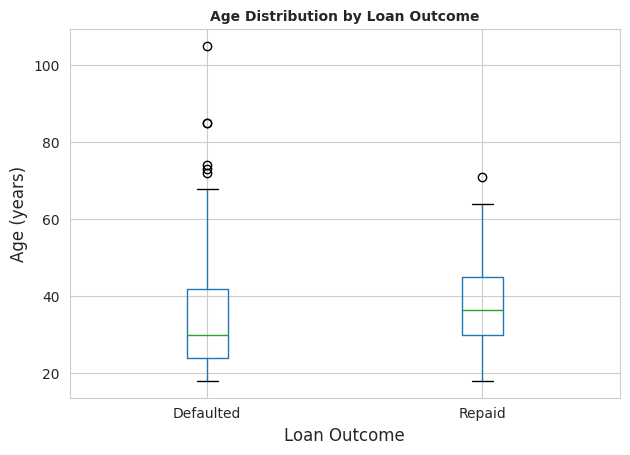

In [33]:
plt.figure(figsize=(3, 3))
main.boxplot(column='age', by='loan_outcome')
plt.title('Age Distribution by Loan Outcome', fontweight='bold', fontsize=10)
plt.suptitle('')  # Remove default title
plt.xlabel('Loan Outcome', fontsize=12)
plt.ylabel('Age (years)', fontsize=12)
plt.xticks([1, 2], ['Defaulted', 'Repaid'])
plt.tight_layout()
plt.show()

<Figure size 1000x600 with 0 Axes>

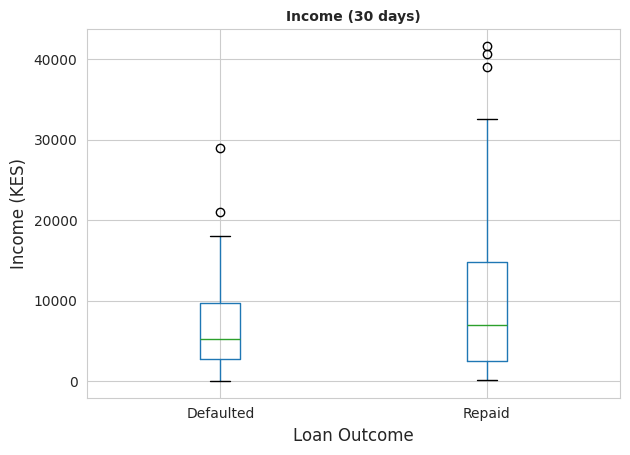

In [34]:
plt.figure(figsize=(10, 6))
main.boxplot(column='cash_incoming_30days', by='loan_outcome')
plt.title('Income (30 days)', fontweight='bold', fontsize=10)
plt.suptitle('')  # Remove default title
plt.xlabel('Loan Outcome', fontsize=12)
plt.ylabel('Income (KES)', fontsize=12)
plt.xticks([1, 2], ['Defaulted', 'Repaid'])
plt.tight_layout()
plt.show()

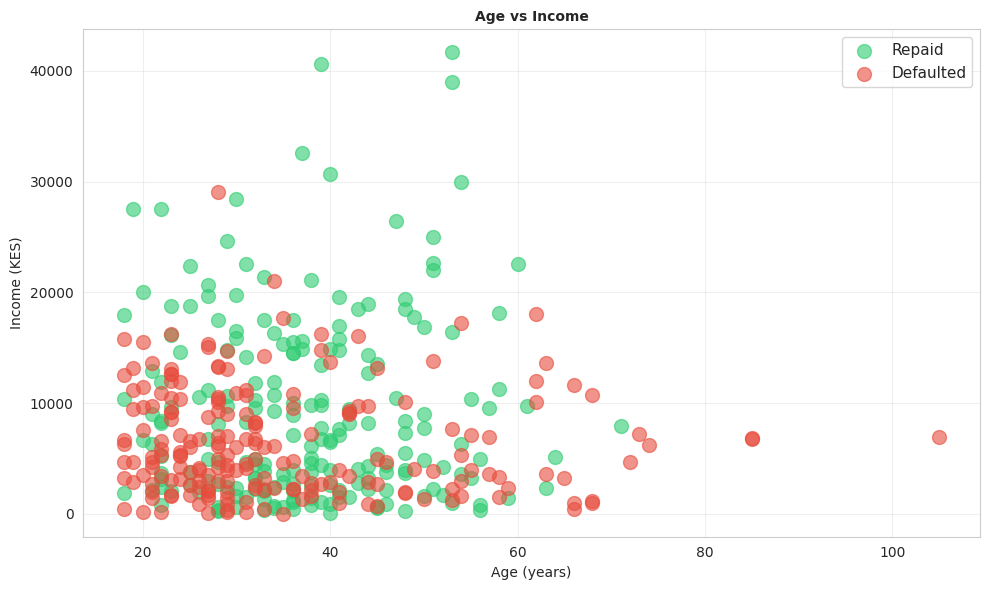

In [35]:
plt.figure(figsize=(10, 6))
repaid = main[main['loan_outcome'] == 'repaid']
defaulted = main[main['loan_outcome'] == 'defaulted']
plt.scatter(repaid['age'], repaid['cash_incoming_30days'], label='Repaid', alpha=0.6, s=100, color='#2ecc71')
plt.scatter(defaulted['age'], defaulted['cash_incoming_30days'], label='Defaulted', alpha=0.6, s=100, color='#e74c3c')
plt.title('Age vs Income', fontweight='bold', fontsize=10)
plt.xlabel('Age (years)', fontsize=10)
plt.ylabel('Income (KES)', fontsize=10)
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


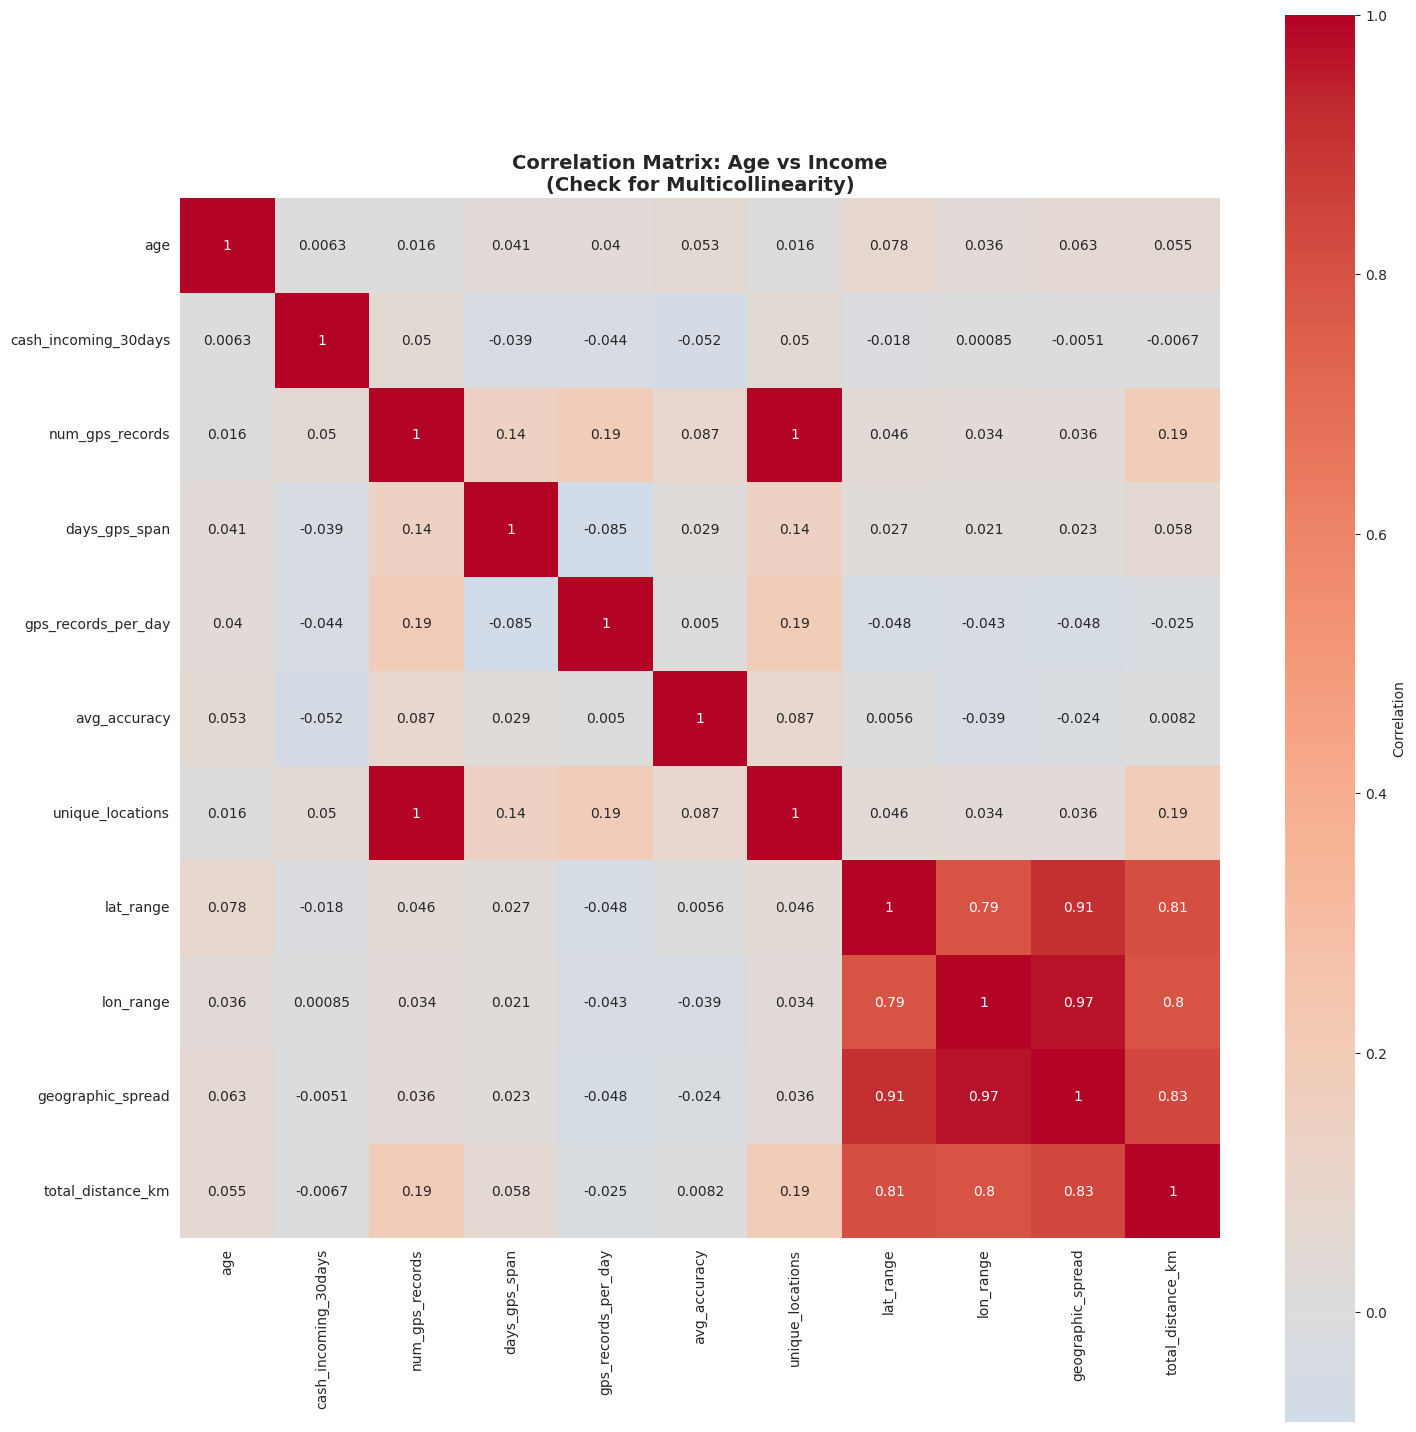

In [37]:
plt.figure(figsize=(15, 15))
correlation_matrix = main[['age', 'cash_incoming_30days','num_gps_records', 'days_gps_span', 'gps_records_per_day',
    'avg_accuracy', 'unique_locations', 'lat_range', 'lon_range',
    'geographic_spread', 'total_distance_km']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, cbar_kws={'label': 'Correlation'}, square=True)
plt.title('Correlation Matrix: Age vs Income\n(Check for Multicollinearity)', fontweight='bold', fontsize=14)
plt.tight_layout()
plt.show()

/tmp/ipykernel_97232/44981922.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=main, x='loan_outcome', y='age', palette=['#e74c3c', '#2ecc71'])


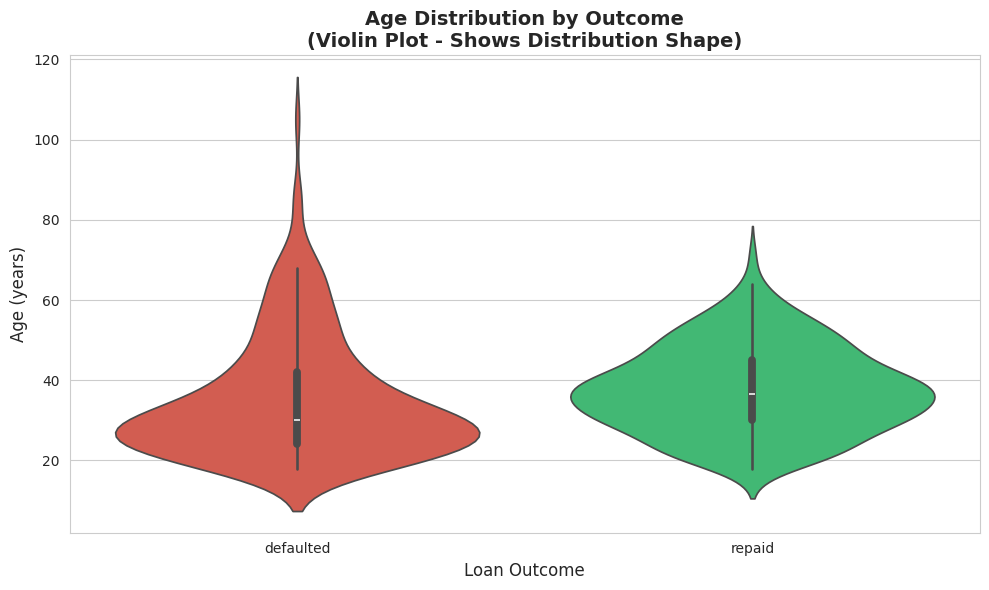

In [93]:
plt.figure(figsize=(10, 6))
sns.violinplot(data=main, x='loan_outcome', y='age', palette=['#e74c3c', '#2ecc71'])
plt.title('Age Distribution by Outcome\n(Violin Plot - Shows Distribution Shape)', fontweight='bold', fontsize=14)
plt.xlabel('Loan Outcome', fontsize=12)
plt.ylabel('Age (years)', fontsize=12)
plt.tight_layout()
plt.show()

/tmp/ipykernel_97232/785495511.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=main, x='loan_outcome', y='cash_incoming_30days', palette=['#e74c3c', '#2ecc71'])


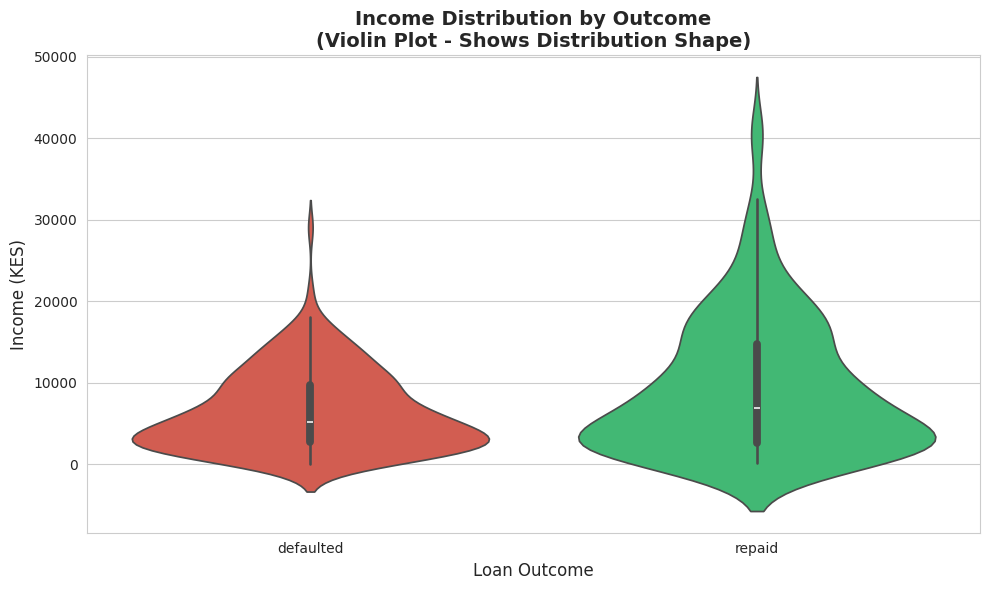

In [94]:
plt.figure(figsize=(10, 6))
sns.violinplot(data=main, x='loan_outcome', y='cash_incoming_30days', palette=['#e74c3c', '#2ecc71'])
plt.title('Income Distribution by Outcome\n(Violin Plot - Shows Distribution Shape)', fontweight='bold', fontsize=14)
plt.xlabel('Loan Outcome', fontsize=12)
plt.ylabel('Income (KES)', fontsize=12)
plt.tight_layout()
plt.show()

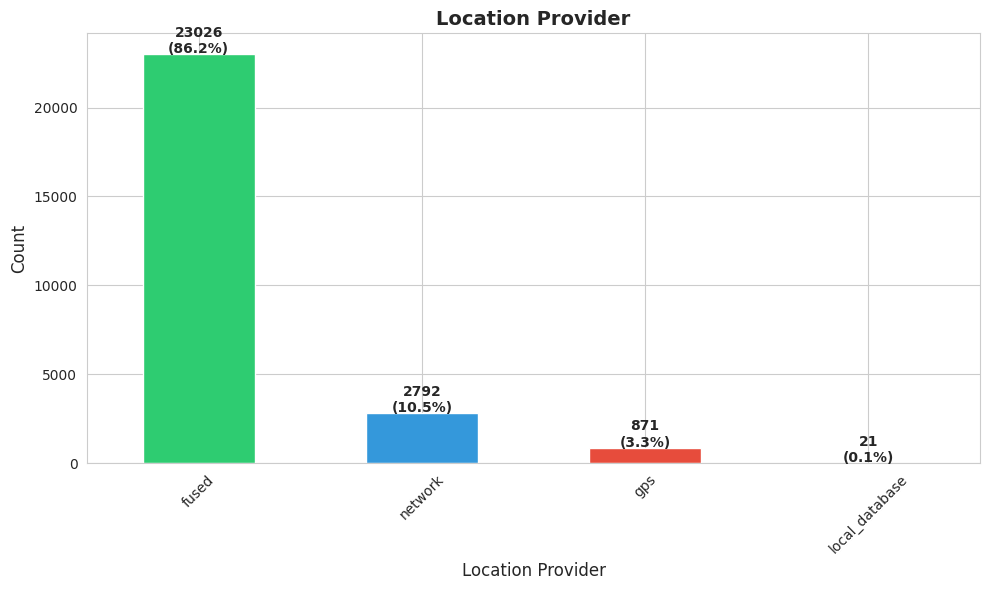

In [38]:
plt.figure(figsize=(10, 6))
provider_counts = gps['location_provider'].value_counts()
colors_provider = ['#2ecc71', '#3498db', '#e74c3c', '#f39c12']
provider_counts.plot(kind='bar', color=colors_provider[:len(provider_counts)])
plt.title('Location Provider', fontweight='bold', fontsize=14)
plt.xlabel('Location Provider', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)
for i, v in enumerate(provider_counts):
    plt.text(i, v + 50, f'{v}\n({v/len(gps)*100:.1f}%)', ha='center', fontweight='bold', fontsize=10)
plt.tight_layout()
plt.show()

USERS WITHOUT GPS DATA
Total users: 400
Users with GPS data: 372
Users WITHOUT GPS data: 28
Coverage: 93.0%

Users without GPS data (sorted by user_id):
     user_id loan_outcome  age  cash_incoming_30days
6          7       repaid   28               2726.06
17        18    defaulted   53               2234.82
27        28    defaulted   65               3219.04
41        42    defaulted   44               9738.20
43        44    defaulted   19               9449.87
47        48    defaulted   40               2905.30
59        60       repaid   47              26459.98
77        78    defaulted   39              14818.23
81        82    defaulted   32               2604.40
83        84       repaid   38               3790.28
98        99    defaulted   29               7066.41
104      105       repaid   53              39018.01
107      108    defaulted   28              13371.98
114      115       repaid   39               7765.33
126      127       repaid   25              18799.85

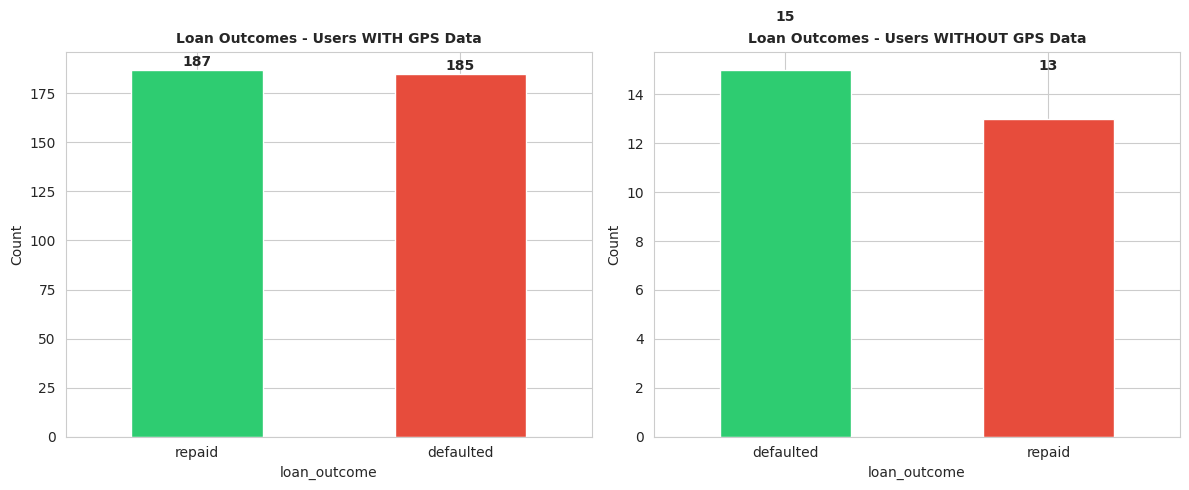

In [ ]:
users_with_gps = set(gps['user_id'].unique())
all_users = set(main['user_id'].unique())
users_without_gps = all_users - users_with_gps

print("="*70)
print("USERS WITHOUT GPS DATA")
print("="*70)
print(f"Total users: {len(all_users)}")
print(f"Users with GPS data: {len(users_with_gps)}")
print(f"Users WITHOUT GPS data: {len(users_without_gps)}")
print(f"Coverage: {len(users_with_gps)/len(all_users)*100:.1f}%\n")

# Get details about users without GPS
users_without_gps_df = main[main['user_id'].isin(users_without_gps)][['user_id', 'loan_outcome', 'age', 'cash_incoming_30days']]
print(f"Users without GPS data (sorted by user_id):")
print(users_without_gps_df.sort_values('user_id'))

# Compare outcomes
print("\n" + "="*70)
print("LOAN OUTCOME COMPARISON")
print("="*70)
print("\nOutcome distribution - Users WITH GPS data:")
with_gps_outcomes = main[main['user_id'].isin(users_with_gps)]['loan_outcome'].value_counts()
print(with_gps_outcomes)

print("\nOutcome distribution - Users WITHOUT GPS data:")
without_gps_outcomes = users_without_gps_df['loan_outcome'].value_counts()
print(without_gps_outcomes)

# Visualize the comparison
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Users with GPS
with_gps_outcomes.plot(kind='bar', ax=axes[0], color=['#2ecc71', '#e74c3c'])
axes[0].set_title('Loan Outcomes - Users WITH GPS Data', fontweight='bold', fontsize=10)
axes[0].set_ylabel('Count')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=0)
for i, v in enumerate(with_gps_outcomes):
    axes[0].text(i, v + 2, f'{v}', ha='center', fontweight='bold')

# Users without GPS
without_gps_outcomes.plot(kind='bar', ax=axes[1], color=['#2ecc71', '#e74c3c'])
axes[1].set_title('Loan Outcomes - Users WITHOUT GPS Data', fontweight='bold', fontsize=10)
axes[1].set_ylabel('Count')
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=0)
for i, v in enumerate(without_gps_outcomes):
    axes[1].text(i, v + 2, f'{v}', ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

/tmp/ipykernel_97232/3174004535.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=gps_with_accuracy, x='location_provider', y='accuracy', palette='Set2')


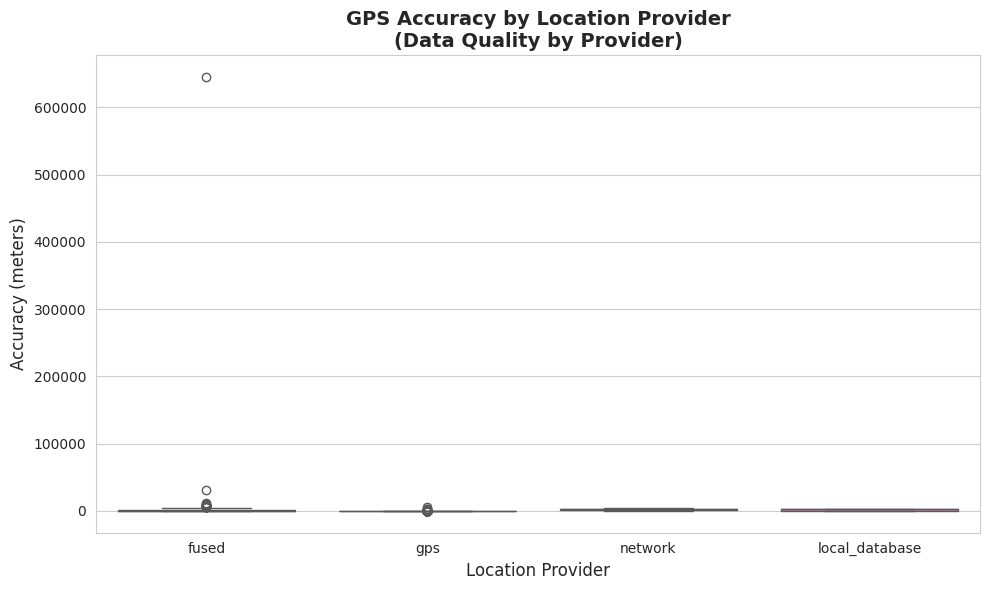

In [108]:
plt.figure(figsize=(10, 6))
gps_with_accuracy = gps[gps['accuracy'] > 0]
sns.boxplot(data=gps_with_accuracy, x='location_provider', y='accuracy', palette='Set2')
plt.title('GPS Accuracy by Location Provider\n(Data Quality by Provider)', fontweight='bold', fontsize=14)
plt.xlabel('Location Provider', fontsize=12)
plt.ylabel('Accuracy (meters)', fontsize=12)
plt.tight_layout()
plt.show()